# Plant Seedlings Classification
Determine the species of a seedling from an image

## Use SMOTE to balance the dataset and save to disk

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function, division

In [3]:
import os
import time
import copy
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import torch
import torchvision 
from torchvision import transforms, datasets

In [8]:
from imblearn.over_sampling import SMOTE

In [9]:
plt.ion()

## load and normalize the data

In [17]:
transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()])

In [18]:
path = './data/curated'

**datasets**

In [19]:
image_dataset = datasets.ImageFolder(os.path.join(path, 'train'), transform) 
                  

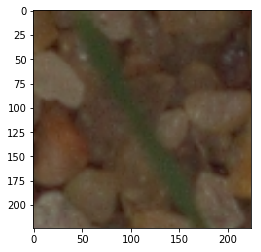

In [43]:
a, b = image_dataset[1]
inp = a.numpy().transpose([1, 2, 0])
plt.imshow(inp)

**get x, y pairs**

In [20]:
x, y = [], []

In [21]:
for i in range(len(image_dataset)):
    temp_x, temp_y = image_dataset[i]
    x.append(temp_x)
    y.append(temp_y)

In [22]:
x = torch.stack(x)

x.size()

torch.Size([3803, 3, 224, 224])

## apply SMOTE

In [23]:
x = x.view(3803, -1)
x.size()

torch.Size([3803, 150528])

In [24]:
x = x.numpy()
y = np.asarray(y)

In [25]:
sm = SMOTE(random_state=2)
x_smote, y_smote = sm.fit_sample(x, y.ravel())

In [26]:
x_smote.shape

(6288, 150528)

In [98]:
class_names = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen',
               'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse',
               'Small-flowered Cranesbill', 'Sugar beet']

## make directories

In [108]:
for class_name in class_names:
    os.mkdir('data/balanced/train/' + class_name)

## save images to disk

In [81]:
x_tensor, y_tensor = torch.from_numpy(x_smote), torch.from_numpy(y_smote)

In [130]:
for i in range(6288):
    image = x_tensor[i].numpy().transpose([1, 2, 0])
    label = y_tensor[i].item()
    
    class_name = class_names[label]
    path = 'data/balanced/train/' + class_name + '/{}.jpg'.format(i)
    # save image
    plt.imsave(path, image)